In [3]:
from IPython.core.display import HTML
from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

import networkx as nx

# Homework 04: The friendship paradox

## Why your friends (probably) have more friends than you do

Please read this short article:

[Friends you can count on](https://opinionator.blogs.nytimes.com/2012/09/17/friends-you-can-count-on/) by Steve Strogatz  

And answer a couple of short questions about it.

If you are really curious, you can also optionally look at the original paper that discussed the friendship paradox (and which was the inspiration for this homework's title):

[Why your friends have more friends than you do](http://www.journals.uchicago.edu/doi/abs/10.1086/229693) by Scott Feld [OPTIONAL BACKGROUND]

**Question 1** According to Strogatz, why do people experience airplanes, restaurants, parks, and beaches to be more crowded than averages would suggest?  
*[Please answer in one or two sentences]*

```
BEGIN QUESTION
name: q1
manual: true
```

**SOLUTION**: Because more people experience these things when they are crowded. So if an airplane flies 2 days, and on one day it carries 100 passengers and on the second day it carries 10 passengers, then 100 people experience the airplane as crowded and 10 people experience the airplane as not crowded.

**Question 2a** Which two groups did Christakis and Fowler monitor to see who got the flu first? Which group ended up actually getting the flu first?  
*[Please answer in one or two sentences]*

```
BEGIN QUESTION
name: q2a
manual: True
```

**SOLUTION**: The two groups were (i) randomly picked students; and (ii) friends of the randomly picked students

**Question 2b** Which two groups did Christakis and Fowler monitor to see who got the flu first? Which group ended up actually getting the flu first?  
*[Please answer in one or two sentences]*

```
BEGIN QUESTION
name: q2b
manual: True
```

**SOLUTION**: The friends of the randomly picked students got the flu first.

## Testing the friendship paradox

In this homework, we're going to see if the friendship paradox seems to hold for the networks from the Add Health study.

#### Read in Add Health networks

 We'll start by loading the Add Health networks into memory, as we have done in lab. This function will help.

In [1]:
def read_add_health_network(network_id):
    """
    network_id : integer from 1 to 84
    
    read in the Add Health network corresponding to the given id number and
    return it as an undirected networkx object
    """

    # this file was downloaded from
    # http://moreno.ss.uci.edu/data.html#adhealth
    edge_file = os.path.join("../..", "data", "add-health", "comm" + str(network_id) + ".dat")
    with open(edge_file, 'r') as f:
        edge_lines = f.readlines()
        
    network = nx.parse_edgelist(edge_lines, nodetype=int, data=[('activity_level', float)])
    
    # note that we call the to_undirected method to ensure we get an undirected network
    return(network.to_undirected())

Now let's use `read_add_health_network` to actually read in all 84 of the Add Health school networks:

In [4]:
number_add_health_networks = 84
add_health_networks = [read_add_health_network(x) for x in range(1,number_add_health_networks+1)]

## Examining the friendship paradox in one network

We'll start by focusing on one specific network from the Add Health dataset. We'll develop some code using this one network. Later on, we'll generalize our results to all of the networks.

In [5]:
one_network = add_health_networks[0]

**Question 3** Make a table that has two columns: one with the id of each node, and another with the degree of each node.

```
BEGIN QUESTION
name: q3
manual: false
points: 2
```

In [14]:
degree_data = Table().with_columns([
    # BEGIN SOLUTION NO PROMPT
    'id', one_network.nodes(),
    'degree', [y for x,y in one_network.degree(one_network.nodes())]
    ])
    # END SOLUTION
""" # BEGIN PROMPT
    'id', ...,
    'degree', ...
    ])
"""; # END PROMPT

degree_data

id,degree
1,3
52,7
2,9
20,9
27,8
33,12
45,5
46,8
57,2
59,5


In [16]:
# TEST
round(np.mean(degree_data['degree']),2)

6.38

In [17]:
# TEST
round(np.sum(degree_data['degree'])) == 440

True

Now let's work on figuring out how to get the average degree of the neighbors of a single node.

In [18]:
one_node = list(one_network.nodes())[0]
one_node

1

This bit of code will show `one_node` and some of the nodes around it:

* `one_node` itself has id 1
* the *neighbors* of `one_node` have ids 36, 37, and 52
* the neighbors of `one_node`'s neighbors (which help you see the degree of each of `one_node`'s neighbors)

NOTE: this code uses some features of the `networkx` library that we aren't going to talk about in this class. So you don't have to understand exactly how it works (though that would be a good challenge if you want one).

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


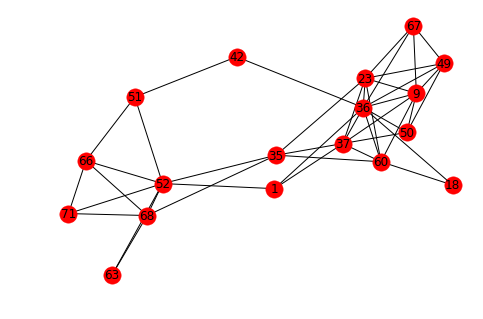

In [19]:
nx.draw(one_network.subgraph(list(nx.single_source_shortest_path_length(one_network, one_node, cutoff=2).keys())),
        with_labels=True)

The `neighbors()` method will return the set of nodes that are adjacent to `one_node`:

In [20]:
[y for y in one_network.neighbors(one_node)]

[52, 36, 37]

Also, you can get the degree of a specific node using the `degree` method:

In [21]:
one_network.degree(one_node)

3

As we can see from the drawing above, one_node has degree 3.

You can use these facts to help answer the next question.

**Question 4** The code below should calculate the average degree of `one_node`'s neighbors. Fill in the missing parts.

```
BEGIN QUESTION
name: q4
manual: false
points: 4
```

In [22]:
one_node_neighbors = one_network.neighbors(one_node)

nbr_degree_total = 0
num_nbrs = 0

# BEGIN SOLUTION NO PROMPT
for nbr in one_node_neighbors:
    nbr_degree_total = nbr_degree_total + one_network.degree(nbr)
    num_nbrs = num_nbrs + 1

result = nbr_degree_total / num_nbrs
# END SOLUTION
""" # BEGIN PROMPT
for nbr in ...:
    nbr_degree_total = nbr_degree_total + ...
    num_nbrs = num_nbrs + 1

result = ... / ...
""" # END PROMPT

print("average degree of neighbors is ", result)

average degree of neighbors is  7.333333333333333


In [23]:
# TEST
round(result,2) 

7.33

In [24]:
# TEST
round(nbr_degree_total)

22

Now let's generalize the code you just wrote by turning it into a function. This will allow you to easily calculate the average degree of the neighbors of any node you want.

**Question 5** Fill in the code below to create a function that, given any network `g` and node `node`, will return the average degree of the node's neighbors.

```
BEGIN QUESTION
name: q5
manual: false
points: 4
```

In [25]:
def get_average_degree_of_neighbors(g, node):
    """Given a network and a node, compute the average degree of the node's neighbors.
    
    Parameters
    ----------
    g : networkx Graph object
        The network that node is a member of
    node : networkx node (actually just an integer)
        The node
    
    Returns
    -------
    float
        The average degree of the neighbors of node
    
    """
    
    # BEGIN SOLUTION NO PROMPT
    ## get the nodes that are the neighbors of node
    node_neighbors = g.neighbors(node)
    
    nbr_degree_total = 0
    num_nbrs = 0
    
    ## get the degrees of each of those nodes
    for nbr in node_neighbors:
        nbr_degree_total = nbr_degree_total + g.degree(nbr)
        num_nbrs = num_nbrs + 1
        
    ## calculate the average
    avg_nbr_degree = nbr_degree_total / num_nbrs
    # END SOLUTION
    """ # BEGIN PROMPT
    ## get the nodes that are the neighbors of node
    node_neighbors = ...
    
    nbr_degree_total = 0
    num_nbrs = 0
    
    ## get the degrees of each of those nodes
    for nbr in node_neighbors:
        nbr_degree_total = nbr_degree_total + ...
        num_nbrs = num_nbrs + 1
        
    ## calculate the average
    avg_nbr_degree = ... / ...    
    """ # END PROMPT
    
    ## return it
    return(avg_nbr_degree)

In [28]:
# TEST
get_average_degree_of_neighbors(one_network, 3)

9.25

In [29]:
# TEST
get_average_degree_of_neighbors(one_network, 10)

7.25

**Question 6** Now use the function you wrote to calculate the average of the neighbors' degrees for every node in `one_network`.

```
BEGIN QUESTION
name: q6
manual: false
points: 3
```

In [30]:
avg_friends_degree = make_array()

# BEGIN SOLUTION NO PROMPT
for node in one_network.nodes():
    avg_friends_degree = np.append(avg_friends_degree, 
                                   get_average_degree_of_neighbors(one_network, node))

nbr_avg_degrees = Table().with_columns([
    'id', one_network.nodes(),
    'avg_friends_degree', avg_friends_degree
])
# END SOLUTION
""" # BEGIN PROMPT
for node in ...:
    avg_friends_degree = np.append(avg_friends_degree, ...)

nbr_avg_degrees = Table().with_columns([
    'id', ...,
    'avg_friends_degree', ...
])
""" # END PROMPT

nbr_avg_degrees

id,avg_friends_degree
1,7.33333
52,6.57143
2,6.66667
20,7.77778
27,6.625
33,7.08333
45,7
46,8
57,10.5
59,9.4


In [31]:
# TEST
np.round(np.mean(nbr_avg_degrees['avg_friends_degree']), 2)

7.71

In [32]:
# TEST
round(nbr_avg_degrees.where(nbr_avg_degrees['id'] == 6)['avg_friends_degree'][0], 2) == 5.4

True

**Question 7** Now you have created a table `degree_data` which has (node id, node degree) and a second table `nbr_avg_degrees` that has (node id, average of friends' degrees). Join these two tables together so that you have a Table with (node id, node degree, average of friends' degrees); call the resulting Table `friend_data`.

```
BEGIN QUESTION
name: q7
points: 1
manual: false
```

In [33]:
# BEGIN SOLUTION NO PROMPT
friend_data = degree_data.join('id', nbr_avg_degrees)
# END SOLUTION
""" # BEGIN PROMPT
friend_data = ....join('id', ...)
""" # END PROMPT

friend_data

id,degree,avg_friends_degree
1,3,7.33333
2,9,6.66667
3,4,9.25
5,4,7.75
6,5,5.4
7,7,6.85714
8,10,7.8
9,9,7.33333
10,4,7.25
11,3,6.33333


In [38]:
# TEST
np.round(np.mean(friend_data['degree']), 2)

6.38

In [42]:
# TEST
round(friend_data.where(friend_data['id'] == 6)['degree'][0], 2) == 5

True

**Question 8** What does the friendship paradox predict about the values in the 'degree' and 'avg_friends_degree' column of the `friend_data` Table that you just made? Does it say that (i) on average, they should be about the same; (ii) on average, `degree` should be bigger than `avg_friends_degree`; or (iii) on average, `avg_friends_degree` should be bigger than `degree`?

```
BEGIN QUESTION
name: q8
points: 4
manual: True
```

**SOLUTION:** (iii) on average, `avg_friends_degree` should be bigger than `degree`.

**Question 9** Now make a scatter plot that shows at the relationship between the degree of each node (x axis) and the average degree of the node's friends (y axis).

```
BEGIN QUESTION
name: q9
points: 2
manual: True
```

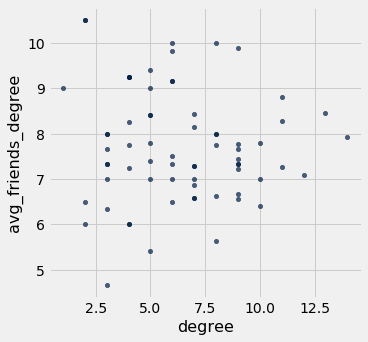

In [43]:
# BEGIN SOLUTION
friend_data.scatter('degree', 'avg_friends_degree')
# END SOLUTION

**Question 10** Does the plot you just made seem consistent with what would be predicted from the friendship paradox?

```
BEGIN QUESTION
name: q10
manual: True
```

**SOLUTION:** Yes, it does: many of the points lie above the $y=x$ line, meaning that `avg_friends_degree` is bigger than `degree`.   NOTE: you could argue that this result is unclear and receive full credit if you give a good reason (we aren't doing a formal test, so there is no proof one way or another).

## The friendship paradox across all of the Add Health networks

#### Write a function that calculates the fraction of nodes whose degree is less than the average of their neighbors.

The plot you just made investigated the friendship paradox by looking at every single node in one network. Now we are going to try to look at all of the different networks in the Add Health study.

One way to do so would be to look at every single node across all of the networks in the Add Health study. However, we're going to try a different approach: we're going to develop a metric that can be calculated once for every network, and then we'll compare that metric across the different networks in the Add Health study.

The metric we'll look at is the fraction of nodes in the network whose degree is smaller than the average of its friends' degrees. Intuitively, when this metric is high, then many nodes in the network experience the friendship paradox (because they have fewer friends than the average of their friends).

**Question 11** The function below should take a network and calculate the fraction of the nodes in the network that have degree smaller than the average of its friends' degrees. Fill in the missing parts. (This function should make use of the work you did above.)

```
BEGIN QUESTION
name: q11
manual: false
points: 2
```

In [44]:
def frac_degree_lt_neighbors(g):
    degree = make_array()
    avg_friends_degree = make_array()
    
    # BEGIN SOLUTION NO PROMPT
    for node in g.nodes():
        degree = np.append(degree, g.degree(node))
        avg_friends_degree = np.append(avg_friends_degree, get_average_degree_of_neighbors(g, node))

    # calculate the fraction of nodes whose degree is smaller than the average of
    # their friends' degrees and return it
    return(np.mean(degree < avg_friends_degree))
    # END SOLUTION
    """ # BEGIN PROMPT
    for node in g.nodes():
        degree = np.append(degree, ...)
        avg_friends_degree = np.append(avg_friends_degree, ...)

    # calculate the fraction of nodes whose degree is smaller than the average of
    # their friends' degrees and return it
    # (HINT: you should fill in a boolean expression here)
    return(np.mean(...))    
    """ # END PROMPT

In [45]:
# TEST
str(round(frac_degree_lt_neighbors(add_health_networks[3]), 4))

'0.7046'

In [46]:
# TEST
str(round(frac_degree_lt_neighbors(add_health_networks[30]), 4))

'0.6818'

Here is a function that takes the function that you wrote above and uses it to calculate the average number of neighbors of each node in a given network. So this function:

1. For each node in the network, calculate the average number of friends that the node's friends have
2. Take the average of that quantity over all of the nodes in the network

We'll use this function below.

In [47]:
def get_avg_nbr_degree(g):
    avg_nbr_degree_total = 0
    num_nodes = 0
    
    for node in g.nodes():
        avg_nbr_degree_total = avg_nbr_degree_total + get_average_degree_of_neighbors(g, node)
        num_nodes = num_nodes + 1
        
    return(avg_nbr_degree_total / num_nodes)

To see an example of the function in action, try this out:

In [48]:
get_avg_nbr_degree(one_network)

7.713074767422592

This means that the average node in the network `one_network` has friends whose average degree is about 7.7

#### Apply the function to calculate the average degree and average friends' degree for all add health networks.

**Question 12** Now go through and, for each Add Health network, calculate (i) the average degree; (ii) the average of each node's neighbors' degrees; (iii) the fraction of nodes for which the degree is smaller than the average of its neighbors' degrees.

*[HINT: You might find it helpful to follow the pattern we used in lab here.]*

```
BEGIN QUESTION
name: q12
points: 3
manual: false
```

In [50]:
avg_degree = make_array()
avg_neighbor_degree = make_array()
frac_smaller_than_neighbors = make_array()

# BEGIN SOLUTION NO PROMPT
for g in add_health_networks:
    avg_degree = np.append(avg_degree, 2.0*g.number_of_edges()/g.number_of_nodes())
    avg_neighbor_degree = np.append(avg_neighbor_degree, get_avg_nbr_degree(g))
    frac_smaller_than_neighbors = np.append(frac_smaller_than_neighbors, frac_degree_lt_neighbors(g))

add_health_msmts = Table().with_columns([
     'id', np.arange(1, number_add_health_networks+1),
     'avg_degree', avg_degree,
     'avg_neighbor_degree', avg_neighbor_degree,
     'frac_lt_neighbors', frac_smaller_than_neighbors
    ])
# END SOLUTION
""" # BEGIN PROMPT
for g in add_health_networks:
    avg_degree = np.append(avg_degree, ...)
    avg_neighbor_degree = np.append(avg_neighbor_degree, ...)
    frac_smaller_than_neighbors = np.append(frac_smaller_than_neighbors, ...)

add_health_msmts = Table().with_columns([
     'id', np.arange(1, number_add_health_networks+1),
     'avg_degree', avg_degree,
     'avg_neighbor_degree', avg_neighbor_degree,
     'frac_lt_neighbors', frac_smaller_than_neighbors
    ])
"""; # END PROMPT

In [51]:
# TEST
str(round(np.mean(add_health_msmts['avg_degree']), 5))

'7.23103'

In [52]:
# TEST
str(round(np.mean(add_health_msmts['avg_neighbor_degree']), 5))

'8.79592'

In [53]:
# TEST
str(round(np.mean(add_health_msmts['frac_lt_neighbors']), 5))

'0.68504'

In [54]:
# TEST
str(round(np.corrcoef(add_health_msmts['avg_degree'], add_health_msmts['avg_neighbor_degree'])[0,1], 5))

'0.98939'

In [55]:
# TEST
str(round(np.corrcoef(add_health_msmts['avg_neighbor_degree'], add_health_msmts['frac_lt_neighbors'])[0,1], 5))

'0.03092'

**Question 13** Make a scatterplot that compares the average degree (x axis) and the average neighbor degree (y axis) across all of the Add Health networks.

```
BEGIN QUESTION
name: q13
manual: True
points: 2
```

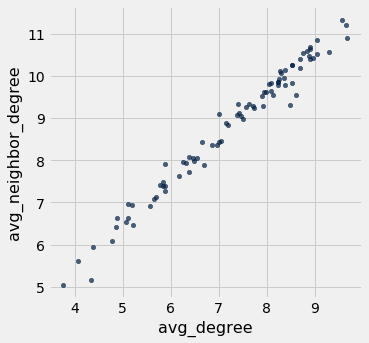

In [56]:
# BEGIN SOLUTION
add_health_msmts.scatter('avg_degree', 'avg_neighbor_degree')
# END SOLUTION

**Question 14** Does the scatterplot you just made seem to be consistent with the friendship paradox?

```
BEGIN QUESTION
name: q14
points: 2
manual: True
```

**SOLUTION:** Yes, it does: all of the points lie above the $y=x$ line, meaning that in every single Add Health network, the average neighbor degree is larger than the average degree.

**Question 15** Make a histogram that shows, across all of the Add Health networks, the distribution of the fraction of nodes whose degree is smaller than the neighbors' average degree.

```
BEGIN QUESTION
name: q15
manual: True
points: 2
```

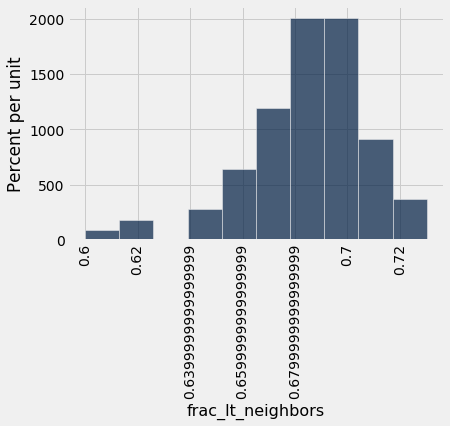

In [57]:
# BEGIN SOLUTION
add_health_msmts.hist('frac_lt_neighbors', bins=np.arange(.55, .75, .01))
# END SOLUTION

**Question 16** Does the histogram you just made seem to be consistent with what you would expect from the friendship paradox?

```
BEGIN QUESTION
name: q16
manual: True
points: 2
```

**SOLUTION:** - You could argue yes, it does: in all networks, well over half of the nodes will have friends whose average degree is higher than their own. You could also argue that it is not clear, since we have not set up a formal test, and so we don't have a good way to tell what we would expect to see under the friendship paradox. (This is a weaker argument, in my opinion, but it isn't wrong.)

# Submit the homework
